In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import problema2.src.preprocessing as prepro
import problema2.src.data_handler as data_handler
from problema2.src.models import LogisticRegression, LinearDiscriminantAnalysis, RandomForest
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

war_class_dev : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema2/data/raw/WAR_class_dev.csv')
war_class_test : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema2/data/raw/WAR_class_test.csv')

## 2.1 )

In [2]:
war_class_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poss          6782 non-null   float64
 1   mp            6782 non-null   float64
 2   raptor_total  6782 non-null   float64
 3   war_total     6782 non-null   float64
 4   pace_impact   6782 non-null   float64
 5   war_class     6782 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 318.0 KB


In [3]:
war_class_dev_processed_and_standardized : pd.DataFrame = prepro.process_and_stardardize(
    war_class_dev, 
    filename='war_class_dev', 
    save_path=f'{project_root}/TP02/problema2/data/processed/'
)
war_class_dev_processed_and_standardized.info()
display(war_class_dev_processed_and_standardized.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6782 entries, 0 to 6781
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poss          6782 non-null   Float64
 1   mp            6782 non-null   Float64
 2   raptor_total  6782 non-null   Float64
 3   war_total     6782 non-null   Float64
 4   pace_impact   6782 non-null   Float64
 5   war_class     6782 non-null   float64
dtypes: Float64(5), float64(1)
memory usage: 351.2 KB


,poss,mp,raptor_total,war_total,pace_impact,war_class
0,-0.696597,-1.005259,-0.403848,-0.530555,0.585699,2.0
1,-1.235442,-1.262282,-0.836539,-0.646773,2.269038,2.0
2,0.769691,0.5551,1.835655,1.701718,-0.961291,3.0
3,1.908678,1.848081,1.503215,2.283932,-1.231505,3.0
4,2.343119,1.941052,1.408249,2.509316,-1.214635,3.0


In [4]:
war_class_counts = war_class_dev_processed_and_standardized['war_class'].value_counts().sort_index()
total = war_class_counts.sum()
class_proportion_table = pd.DataFrame(columns=["Class 1", "Class 2", "Class 3"])
class_proportion_table.loc['Proporción'] = [
    (total - war_class_counts[1]) / war_class_counts[1],
    (total - war_class_counts[2]) / war_class_counts[2],
    (total - war_class_counts[3]) / war_class_counts[3],
]
display(class_proportion_table)
class_probability_table = pd.DataFrame(columns=["Class 1", "Class 2", "Class 3"])
class_probability_table.loc['Probabilidad'] = [
    war_class_counts[1] / total,
    war_class_counts[2] / total,
    war_class_counts[3] / total,
]
display(class_probability_table)
print("")
print("Esperanza de la probabilidad de pertenecer a cada clase: ", class_probability_table.loc['Probabilidad'].mean())
print("")
print("Podemos observar que las clases están bien balanceadas.")
display(war_class_dev_processed_and_standardized.head())

,Class 1,Class 2,Class 3
Proporción,2.342533,1.703069,2.022282


,Class 1,Class 2,Class 3
Probabilidad,0.299174,0.36995,0.330876



Esperanza de la probabilidad de pertenecer a cada clase:  0.3333333333333333

Podemos observar que las clases están bien balanceadas.


,poss,mp,raptor_total,war_total,pace_impact,war_class
0,-0.696597,-1.005259,-0.403848,-0.530555,0.585699,2.0
1,-1.235442,-1.262282,-0.836539,-0.646773,2.269038,2.0
2,0.769691,0.5551,1.835655,1.701718,-0.961291,3.0
3,1.908678,1.848081,1.503215,2.283932,-1.231505,3.0
4,2.343119,1.941052,1.408249,2.509316,-1.214635,3.0


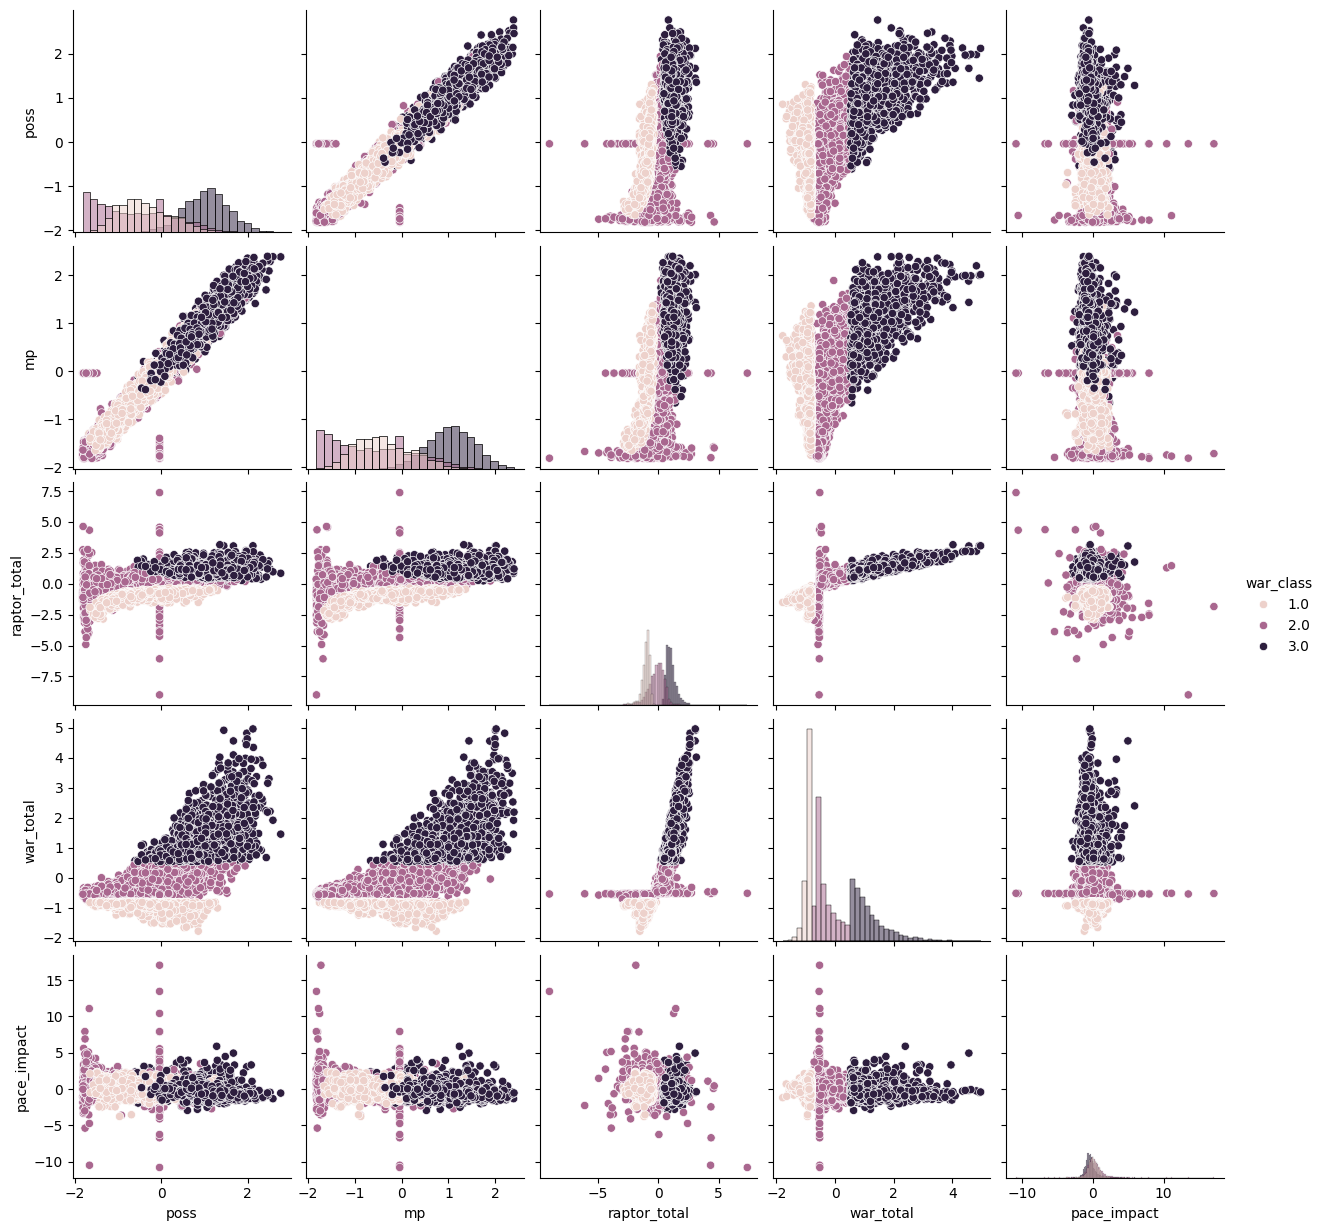

In [5]:
sb.pairplot(war_class_dev_processed_and_standardized, hue='war_class', diag_kind='hist', corner=False)
plt.show()

In [6]:
# Se observa una correlación lineal entre las features 'mp' y 'poss', como también una menor correlación en las features 'raptor_total' y 'war_total'
# Esto se observa más claramente en el siguiente gráfico

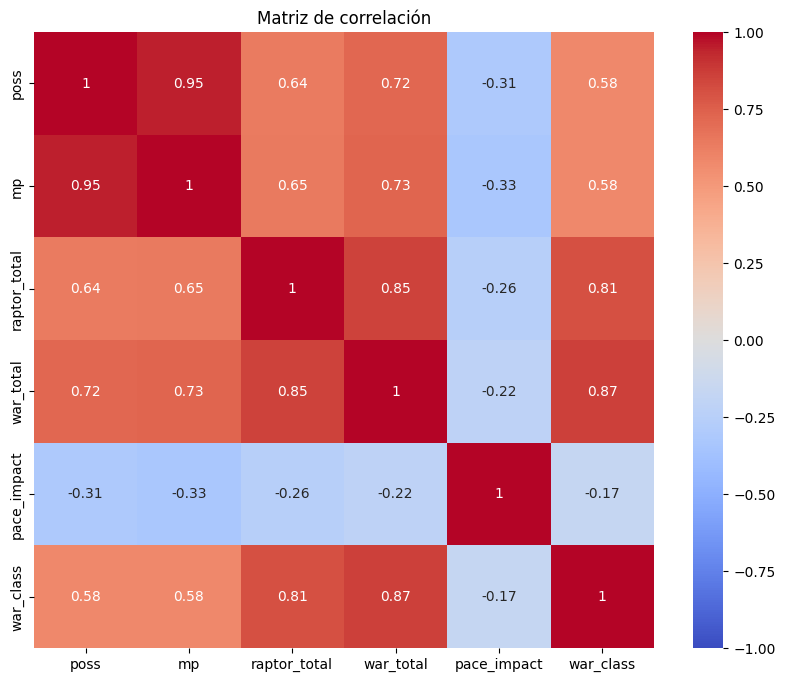

In [7]:
plt.figure(figsize=(10, 8))
sb.heatmap(war_class_dev_processed_and_standardized.corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Matriz de correlación')
plt.show()

In [8]:
# Tanto 'poss', como 'mp' proporcionan el mismo nivel de información. Por lo que es posible descartar alguna de las dos feautures.
display(war_class_dev_processed_and_standardized.head())
war_class_dev_processed_and_standardized = war_class_dev_processed_and_standardized.drop(columns=['poss'])
display(war_class_dev_processed_and_standardized.head())

,poss,mp,raptor_total,war_total,pace_impact,war_class
0,-0.696597,-1.005259,-0.403848,-0.530555,0.585699,2.0
1,-1.235442,-1.262282,-0.836539,-0.646773,2.269038,2.0
2,0.769691,0.5551,1.835655,1.701718,-0.961291,3.0
3,1.908678,1.848081,1.503215,2.283932,-1.231505,3.0
4,2.343119,1.941052,1.408249,2.509316,-1.214635,3.0


,mp,raptor_total,war_total,pace_impact,war_class
0,-1.005259,-0.403848,-0.530555,0.585699,2.0
1,-1.262282,-0.836539,-0.646773,2.269038,2.0
2,0.5551,1.835655,1.701718,-0.961291,3.0
3,1.848081,1.503215,2.283932,-1.231505,3.0
4,1.941052,1.408249,2.509316,-1.214635,3.0


## 2.2 )

In [ ]:
train : pd.DataFrame
validation : pd.DataFrame
train, validation = data_handler.get_train_and_validation_sets(war_class_dev_processed_and_standardized, train_fraction=0.8, seed=42)
X_train : np.ndarray = train.drop(columns=['war_class']).to_numpy()
Y_train : np.ndarray = train['war_class'].to_numpy()
X_validation : np.ndarray = validation.drop(columns=['war_class']).to_numpy()
Y_validation : np.ndarray = validation['war_class'].to_numpy()

lda = LinearDiscriminantAnalysis(
    X_train, 
    Y_train
)
log_reg : LogisticRegression = LogisticRegression(
    X_train,
    Y_train, 
    L2=0
)
rf = RandomForest(n_trees=10, min_samples_split=2, max_depth=10)

## 2.3 )

In [ ]:
lda.fit()
lda.predict(X_validation)
lda.evaluate_threshold(validation['war_class'].to_numpy(), threshold=0.5)

log_reg.fit_gradient_descent(step_size=0.001, tolerance=0.001, max_number_of_steps=10000)
log_reg.evaluate(ground_truth=validation['war_class'].to_numpy(), input=validation.drop(columns=['war_class']).to_numpy())

rf.fit(train.drop(columns=['war_class']).to_numpy(), train['war_class'].to_numpy())
rf.predict(validation.drop(columns=['war_class']).to_numpy())
total_accuracy : float = rf.evaluate(validation['war_class'].to_numpy())